In [418]:
!pip install -r requirements.txt

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lettura dei dataset


In [420]:
trdata = pd.read_csv("train.csv")
tedata = pd.read_csv("test.csv")

# Controllo dei valori nulli

Il primo lavoro da realizzare è il controllo dei valori nulli, dato che un singolo valore nullo può far crashare tutto il codice.

In [421]:
print(trdata.isnull().sum())
print(tedata.isnull().sum())

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64
Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


# Breve descrizione del dataset

In [422]:
trdata.describe()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,120.434555,0.303665,61.104712,0.408377,554.157068,0.418848,38.769634,0.361257,267623.101675,1.390890,136.157068,0.659686,0.303665,131.298429
std,68.678999,0.461048,12.381630,0.492825,937.892327,0.494667,11.736104,0.481627,97420.292342,0.941443,4.646044,0.475060,0.461048,79.503591
min,1.000000,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,59.500000,0.000000,50.500000,0.000000,109.000000,0.000000,30.000000,0.000000,216500.000000,0.900000,134.000000,0.000000,0.000000,67.500000
50%,120.000000,0.000000,60.000000,0.000000,213.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,117.000000
75%,182.000000,1.000000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,305000.000000,1.400000,139.000000,1.000000,1.000000,207.000000
max,237.000000,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,6.800000,146.000000,1.000000,1.000000,285.000000


Possiamo vedere che nel training set, si hanno 70% dei valori che corrispondono alla classe 0 (non morto) e il restante 30% alla classe 1 (morto). Questo tipo di rapporto può creare problemi durante la classificazione.

In [423]:
trdata.DEATH_EVENT.value_counts(normalize=True)

0    0.696335
1    0.303665
Name: DEATH_EVENT, dtype: float64

# Feature Selection

<b>Heatmap:</b>
Per la feature selection ho deciso di utilizzare una heatmap. Il comando df.corr() dei DataFrame, ci permette di ottenere una matrice di correlazione NxN (dove N è il numero di features) dove viene applicata la correlazione di ogni feature con l'altra. Il risultato di questa operazione è stato poi graficato tramite una heatmap.
In questo modo ho deciso di utilizzare le feature che avessero un valore di correlazione con la feature Target maggiore di una soglia.

A questo punto quello ci interessa nella seguente Heatmap è il valore di correlazione delle colonne con la colonna <b>DEATH_EVENT</b>. 

La soglia che ho selezionato per la feature selection è stata: 

| corr[i][DEATH_EVENT.index] | >= 0.2

Ciò vuol dire che ogni correlazione dove il valore assoluto fosse maggiore o uguale a 0.2 avrebbe corrisposto alla selezione della feature.

Ciò quindi ci ha lasciato con le feature: <b>
- age
- ejection_fraction
- serum_creatinine
- serum_sodium
- time
 </b>

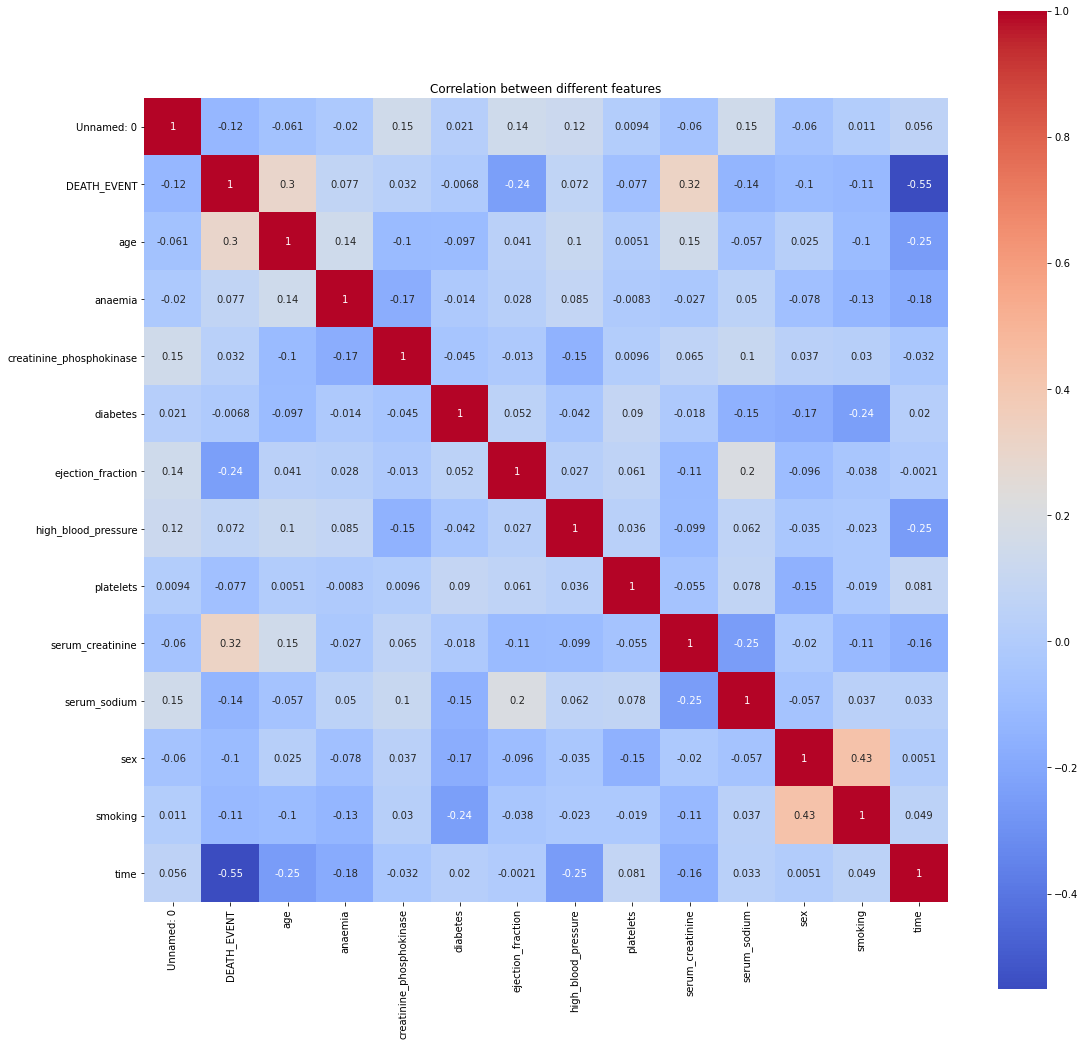

In [424]:
correlation = trdata.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation between different features')
plt.show()

In [425]:
features_utilizzate = ['time','ejection_fraction','serum_creatinine','age']

X_train = trdata[features_utilizzate]
y_train = trdata.DEATH_EVENT

X_test = tedata[features_utilizzate]
y_test = tedata.DEATH_EVENT

# Label Encoding

<b>age:</b> Per quanto riguarda l'età l'encoding è stato fatto raggruppando i valori in 4 gruppi diversi. Per la scelta dell'intervallo da utilizzare gruppo ho utilizzato la formula:

(MaxAge - MinAge)/4 = (95-40)/4 = 13.75 = 13

Quindi i 4 intervalli partono da 40, e contengono ognuno 14 numeri (estremi inclusi). Inoltre è stato assegnato un gruppo anche ai possibili valori x che potessero ricadere nell'intervallo: x<40 || x>95 in modo evitare problemi di esecuzione e visto che in ogni caso questi sarebbero valori outlier di bassa importanza,
I valori di massimo e minimo sono stati presi dal training set.

<b>ejection_fraction, time:</b> è stato realizzato un lavoro simile a quello di age, ma questa volta è stato fatto tramite la funzione cut.

<b>serum_sodium:</b> Questa feature è stata eliminata visto che dopo ripetute analisi e prove è stato verificato che ogni volta peggiorava il risultato. Questo anche provando diversi intervalli di codifica. è stato graficato per

<b>serum_creatinine</b> Dopo aver visto la distribuzione dei valori di questa feature, sia tramite il comando describe, sia tramite i grafici, questa è stata codificata tramite tre intervalli. Il primo tra 0.5 e 1, il secondo tra 1 e 2 e il terzo per ogni valore > 2 che sono i casi outlier.

In [426]:
Deaddata = trdata.loc[trdata['DEATH_EVENT']==1]
Alivedata = trdata.loc[trdata['DEATH_EVENT']==0]

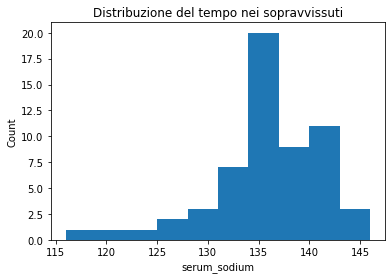

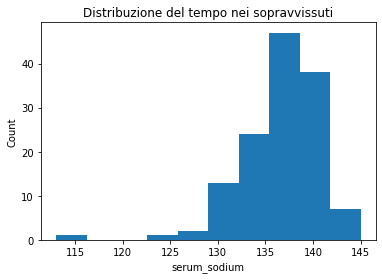

In [427]:
plt.hist(Deaddata['serum_sodium'])
plt.xlabel('serum_sodium')
plt.ylabel('Count')
plt.title('Distribuzione del tempo nei sopravvissuti')
plt.show()

plt.hist(Alivedata['serum_sodium'])
plt.xlabel('serum_sodium')
plt.ylabel('Count')
plt.title('Distribuzione del tempo nei sopravvissuti')
plt.show()

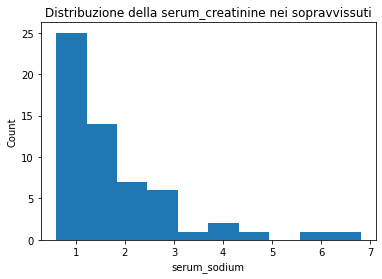

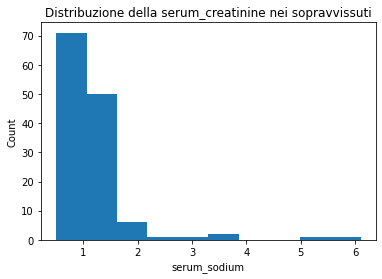

In [433]:
plt.hist(Deaddata['serum_creatinine'])
plt.xlabel('serum_creatinine')
plt.ylabel('Count')
plt.title('Distribuzione della serum_creatinine nei sopravvissuti')
plt.show()

plt.hist(Alivedata['serum_creatinine'])
plt.xlabel('serum_creatinine')
plt.ylabel('Count')
plt.title('Distribuzione della serum_creatinine nei sopravvissuti')
plt.show()

In [429]:
trdata.age.describe()

count    191.000000
mean      61.104712
std       12.381630
min       40.000000
25%       50.500000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [430]:
def codifica_eta(dataset):
    dataset= dataset.copy()
    age = np.asanyarray(dataset['age'])
    for i in range(0, age.size):
        if 40 <= age[i] <= 53:
            age[i] = 0
        elif 54 <= age[i] <= 67:
            age[i] = 1
        elif 68 <= age[i] <= 81:
            age[i] = 2
        elif 82 <= age[i] <= 95:
            age[i] = 3
        else:
            age[i] = 4
            
    dataset['age'] = pd.DataFrame(age)
    return dataset

def codifica_creatinine(dataset):
    dataset= dataset.copy()
    cre = np.asanyarray(dataset['serum_creatinine'])
    for i in range(0, cre.size):
        if 0 <= cre[i] <= 1:
            cre[i] = 0
        elif 1 < cre[i] <= 2:
            cre[i] = 1
        else:
            cre[i] = 2
            
    dataset['serum_creatinine'] = pd.DataFrame(cre)
    return dataset


X_train = codifica_eta(X_train)
X_test = codifica_eta(X_test)


X_train = codifica_creatinine(X_train)
X_test = codifica_creatinine(X_test)

X_train['time'] = pd.cut(X_train['time'], bins=4, labels=np.arange(4), right=False)
X_test['time'] = pd.cut(X_test['time'], bins=4, labels=np.arange(4), right=False)

X_train['ejection_fraction'] = pd.cut(X_train['ejection_fraction'], bins=4, labels=np.arange(4), right=False)
X_test['ejection_fraction'] = pd.cut(X_test['ejection_fraction'], bins=4, labels=np.arange(4), right=False)

,time,ejection_fraction,serum_creatinine,age
0,2,1,0.0,1.0
1,2,1,0.0,1.0
2,1,1,1.0,2.0
3,2,1,0.0,0.0
4,2,1,1.0,0.0
...,...,...,...,...
186,3,1,0.0,0.0
187,1,1,1.0,2.0
188,2,0,0.0,0.0
189,2,0,1.0,2.0


# Modello e Risultati

Per quanto riguarda il modello di classificazione è stato utilizzato un Decision Tree. Si è deciso di limitare il numero di foglie da costruire visto che altrimenti questo non si ferma e va in overfitting. 

Per quanto riguarda i risultati ottenuti nella matrice di confusione, questi purtroppo variano. In generale l'errore 

In [431]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_leaf_nodes=6,random_state=8, criterion='entropy')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test, prediction))

Accuracy: 0.875


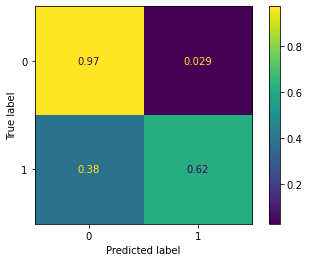

In [432]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test,y_test,normalize='true')